In [2]:
import sys
sys.path.append("../")

from utility.reaction_rate_calc import *
from utility.plotting import *
from utility.animations import *

PATH = "../data/"
SAVE_PATH = "../plots/"

energy_kelvin = 3700

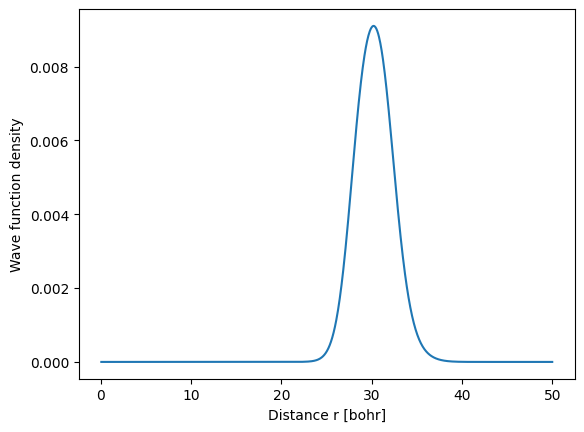

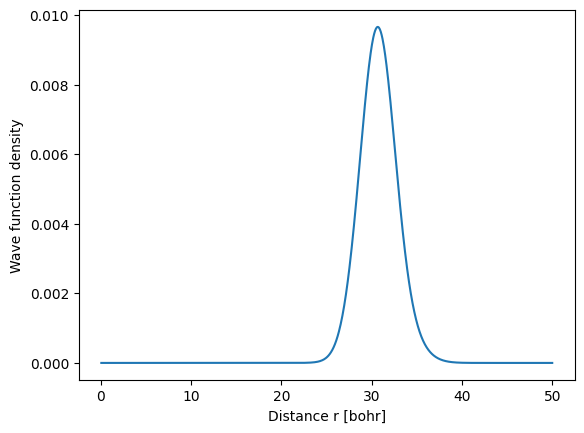

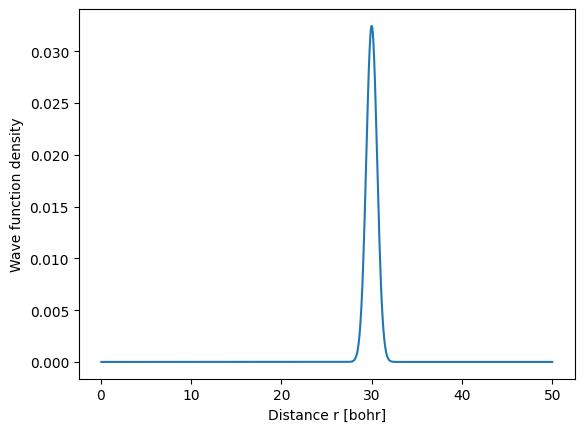

In [4]:
animator = Animator(PATH, "coriolis_0_0", SAVE_PATH, "coriolis_0_0")

animator.distance_animation()
animator.angular_animation()
animator.omega_animation()

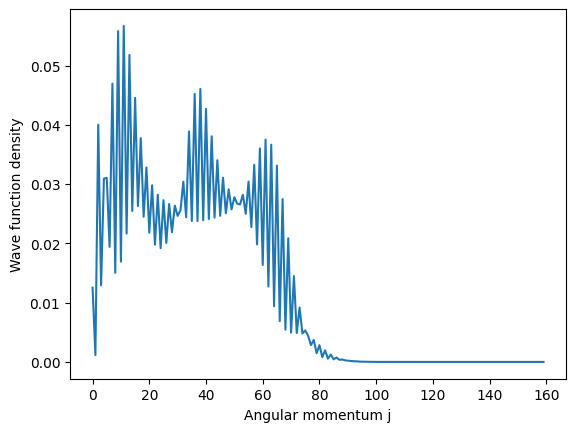

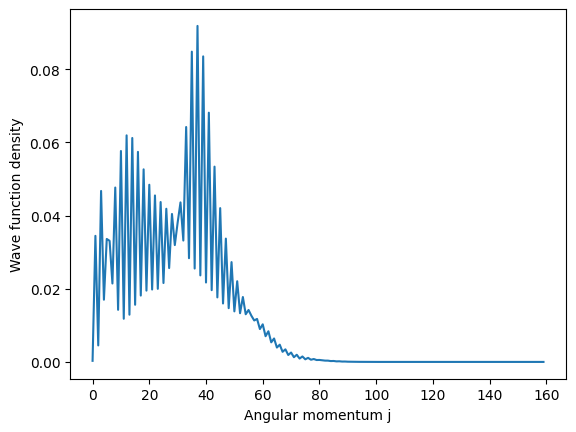

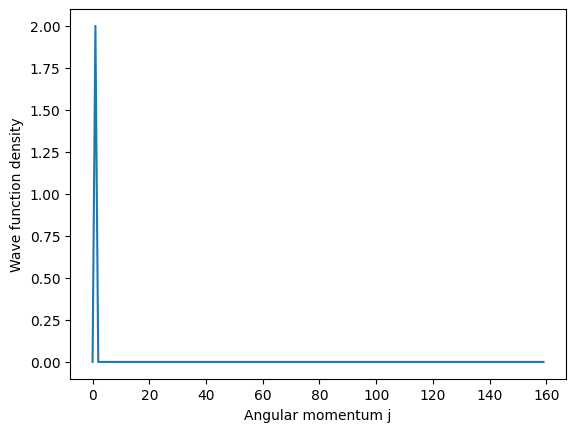

In [5]:
animator.file_prefix = "coriolis_1_0"
animator.save_prefix = "coriolis_1_0"

animator.distance_animation()
animator.angular_animation()
animator.omega_animation()

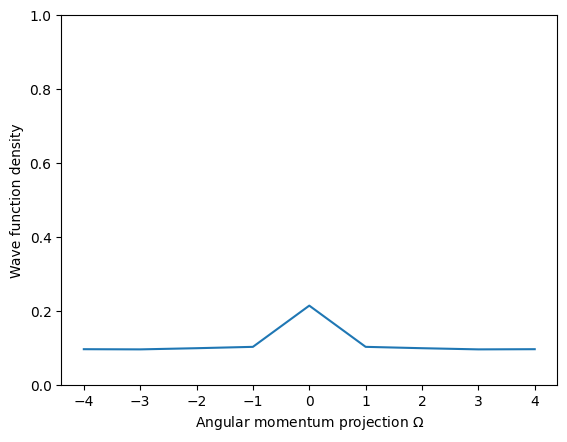

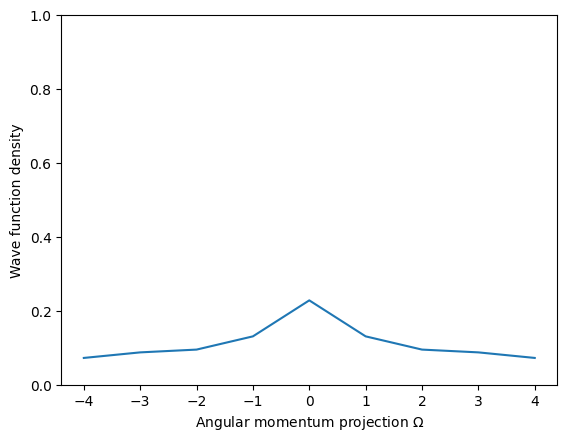

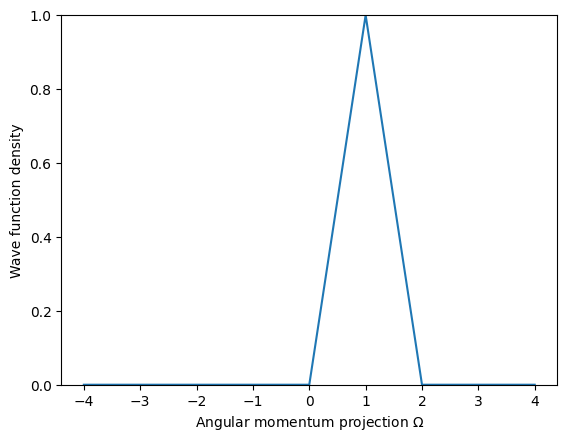

In [2]:
animator.file_prefix = "coriolis_1_1"
animator.save_prefix = "coriolis_1_1"

animator.distance_animation()
animator.angular_animation()
animator.omega_animation()

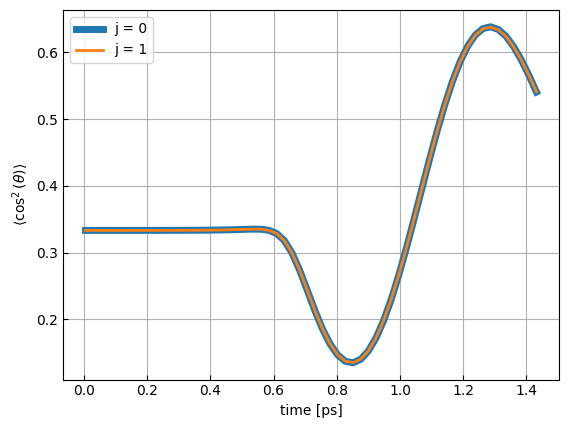

In [4]:
alignments = AlignmentPlot(PATH)

fig, ax = alignments.plot_series(
    alignments.single_j("coriolis", 0),
    alignments.single_j("coriolis", 1)
)
ax.lines[0].set_linewidth(5)
ax.lines[1].set_linewidth(2)
ax.legend(["j = 0", "j = 1"]);

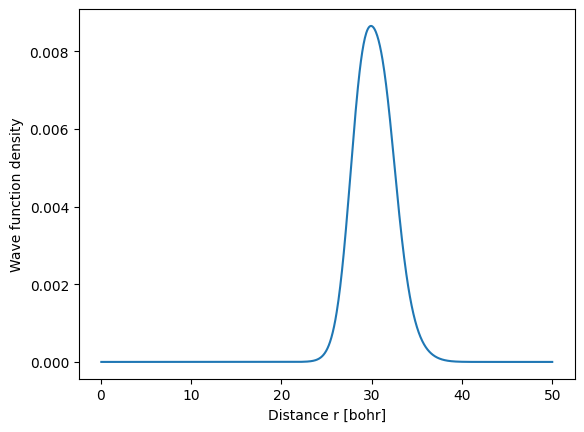

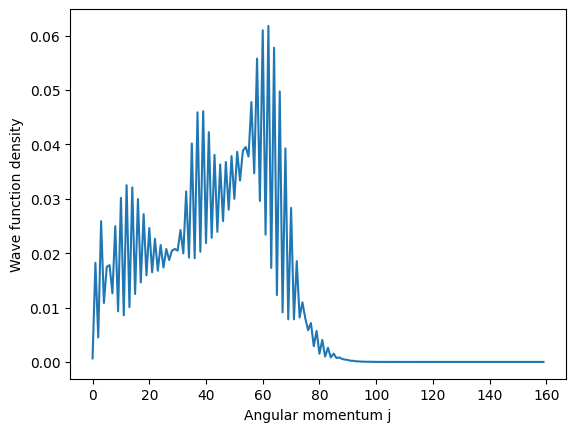

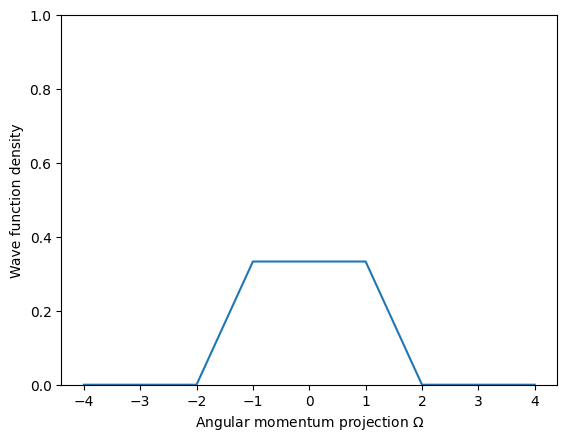

In [8]:
animator.file_prefix = "coriolis_1_phase_0_0"
animator.save_prefix = "coriolis_1_phase_0_0"

animator.distance_animation()
animator.angular_animation()
animator.omega_animation()

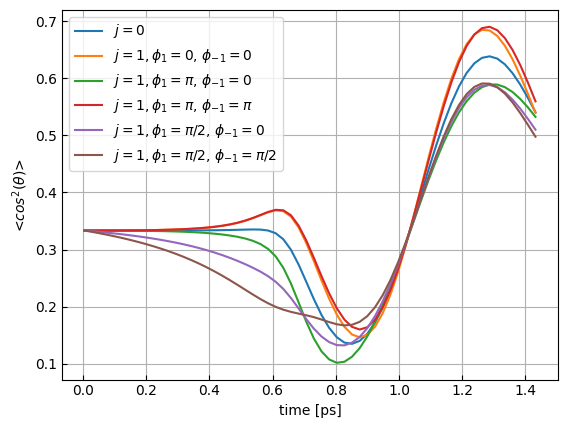

In [3]:
fig, ax = alignments.plot_series(
    alignments.single("coriolis_0_0"),
    alignments.single_j("coriolis", 1),
    alignments.single("coriolis_1_phase_0_0"),
    alignments.single("coriolis_1_phase_pi_0"),
    alignments.single("coriolis_1_phase_pi_pi"),
    alignments.single("coriolis_1_phase_hpi_0"),
    alignments.single("coriolis_1_phase_hpi_hpi")
)

ax.legend([
    "j = 0",
    "j = 1",
    r"j = 1, $\phi_1 = 0, \phi_{-1} = 0$",
    r"j = 1, $\phi_1 = \pi, \phi_{-1} = 0$",
    r"j = 1, $\phi_1 = \pi, \phi_{-1} = \pi$",
    r"j = 1, $\phi_1 = \pi/2, \phi_{-1} = 0$",
    r"j = 1, $\phi_1 = \pi/2, \phi_{-1} = \pi/2$",
])
fig.lines[0].set_linewidth(4)

fig.savefig(f"{SAVE_PATH}/coriolis_phases.pdf");

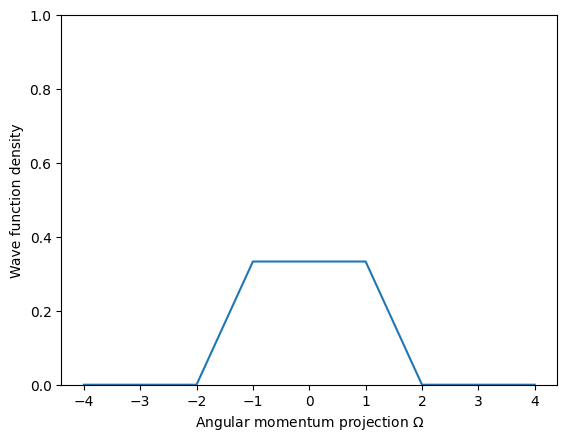

In [10]:
animator.file_prefix = "coriolis_1_phase_hpi_hpi"
animator.save_prefix = "coriolis_1_phase"

animator.omega_animation()

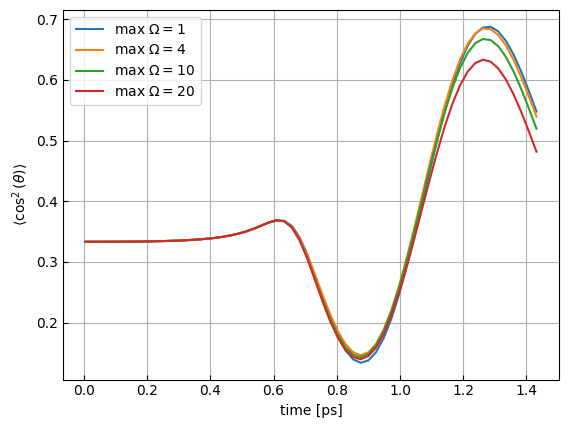

In [6]:
omega_maxes = (1, 4, 10, 20)

alignments.plot_series(
    *(alignments.single(f"coriolis_1_phase_coriolis_omega_max_{omega_max}") 
        for omega_max in omega_maxes)
)
ax.legend([fr"max $\Omega = {omega_max}$" for omega_max in omega_maxes])

fig.savefig(f"{SAVE_PATH}/coriolis_phases_convergence.pdf");

saved animation as ../plots//free_coriolis_distance_animation.gif
saved animation as ../plots//free_coriolis_angular_animation.gif
saved animation as ../plots//free_coriolis_polar_animation.gif
saved animation as ../plots//free_coriolis_omega_animation.gif


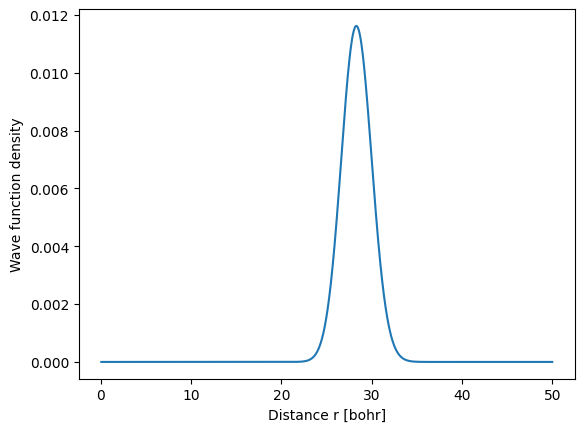

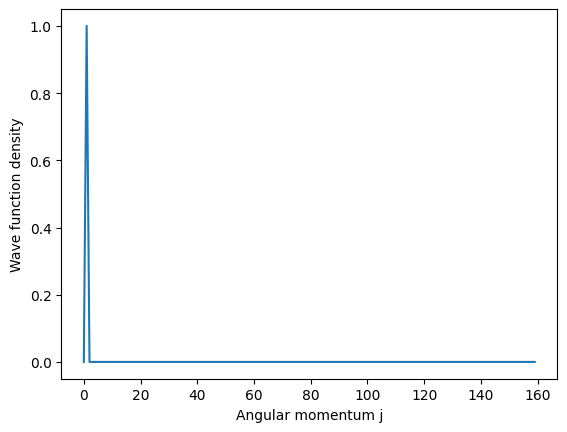

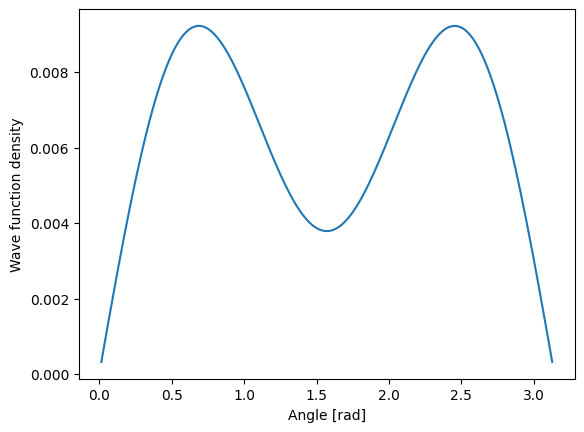

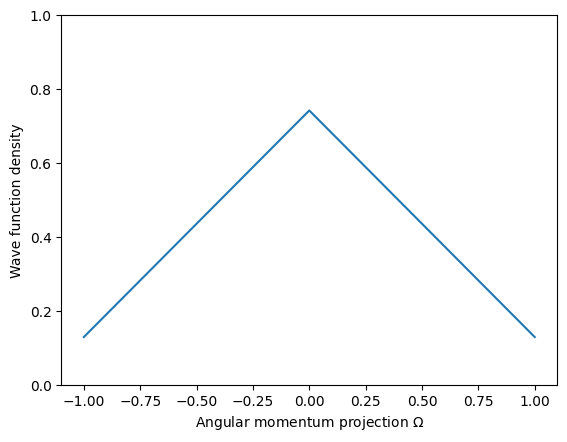

In [2]:
animator = Animator(PATH, "free_coriolis", SAVE_PATH, "free_coriolis")

animator.distance_animation()
animator.angular_animation()
animator.polar_animation()
animator.omega_animation()

In [18]:
from utility.reaction_rate_calc import *
from utility.propagation import SpinOne

PATH = "../data/"
SAVE_PATH = "../plots/"
omega_max = 2

In [19]:
j_init = 0
omega_init = 0

losses = Losses(PATH, f"coriolis_losses_omega_max_{omega_max}_{j_init}_{omega_init}.dat", j_init, omega_init)
pi_reaction_0 = losses.get_reaction(Ionization.Penning)
di_reaction_0 = losses.get_reaction(Ionization.Dissociative)

print(f"Penning reaction rate: {pi_reaction_0.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_0.reaction_rate:.4}")

Penning reaction rate: 8.569e-11
Dissociative reaction rate: 1.858e-10


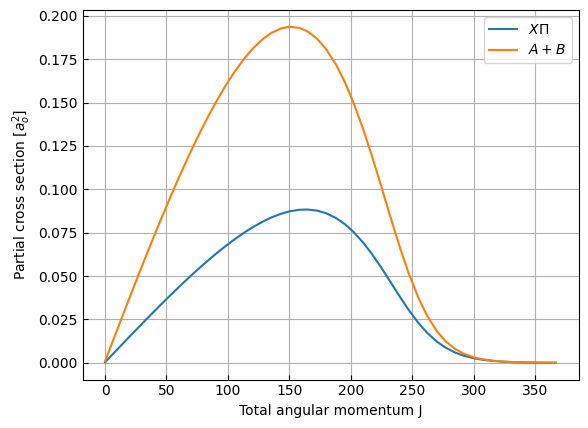

In [20]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_0.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_0.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

In [21]:
j_init = 1
omega_init = SpinOne(1/3, 0, 1/3, 0)

losses = Losses(PATH, f"coriolis_losses_omega_max_{omega_max}_{j_init}_{omega_init}.dat", j_init, None)
pi_reaction_1 = losses.get_reaction(Ionization.Penning)
di_reaction_1 = losses.get_reaction(Ionization.Dissociative)

print(f"Penning reaction rate: {pi_reaction_0.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_0.reaction_rate:.4}")

Penning reaction rate: 8.569e-11
Dissociative reaction rate: 1.858e-10


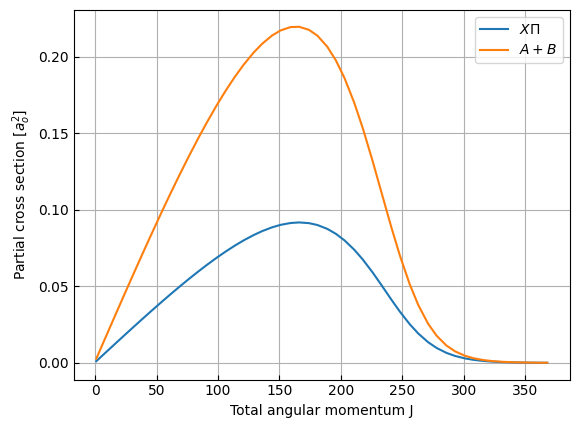

In [22]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_1.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_1.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

In [23]:
pi_rate_0 = pi_reaction_0.reaction_rate
pi_rate_1 = pi_reaction_1.reaction_rate

di_rate_0 = di_reaction_0.reaction_rate
di_rate_1 = di_reaction_1.reaction_rate

print(f"Total reaction rate for j=0:")
print(f"Penning ionization: {pi_rate_0:.4}")
print(f"Dissociative ionization: {di_rate_0:.4}")
print()
print(f"Total reaction rate for j=1:")
print(f"Penning ionization: {pi_rate_1:.4}")
print(f"Dissociative ionization: {di_rate_1:.4}")
print()
print(f"Ratios j=1 to j=0:")
print(f"Penning ionization: {pi_rate_1/pi_rate_0}")
print(f"Dissociative ionization: {di_rate_1/di_rate_0}")

Total reaction rate for j=0:
Penning ionization: 8.569e-11
Dissociative ionization: 1.858e-10

Total reaction rate for j=1:
Penning ionization: 8.938e-11
Dissociative ionization: 2.114e-10

Ratios j=1 to j=0:
Penning ionization: 1.043094208662236
Dissociative ionization: 1.1378883342712787


In [24]:
j_init = 1
omega_init = 0

losses = Losses(PATH, f"coriolis_losses_omega_max_{omega_max}_{j_init}_{omega_init}.dat", j_init, omega_init)
pi_reaction_1_0 = losses.get_reaction(Ionization.Penning)
di_reaction_1_0 = losses.get_reaction(Ionization.Dissociative)

print(f"Penning reaction rate: {pi_reaction_1_0.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_1_0.reaction_rate:.4}")

Penning reaction rate: 2.563e-11
Dissociative reaction rate: 6.547e-11


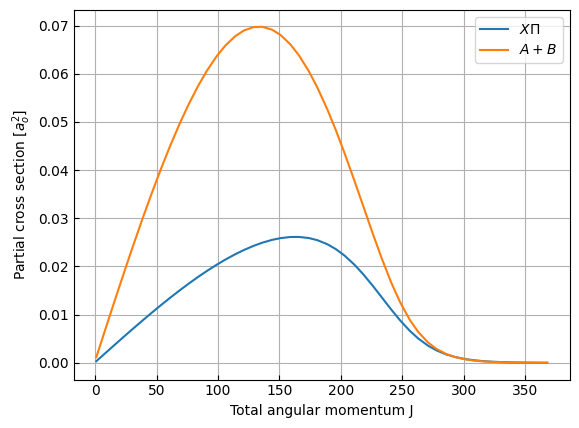

In [25]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_1_0.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_1_0.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

In [26]:
j_init = 1
omega_init = 1

losses = Losses(PATH, f"coriolis_losses_omega_max_{omega_max}_{j_init}_{omega_init}.dat", j_init, omega_init)
pi_reaction_1_1 = losses.get_reaction(Ionization.Penning)
di_reaction_1_1 = losses.get_reaction(Ionization.Dissociative)

print(f"Penning reaction rate: {pi_reaction_1_1.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_1_1.reaction_rate:.4}")

Penning reaction rate: 6.016e-11
Dissociative reaction rate: 1.205e-10


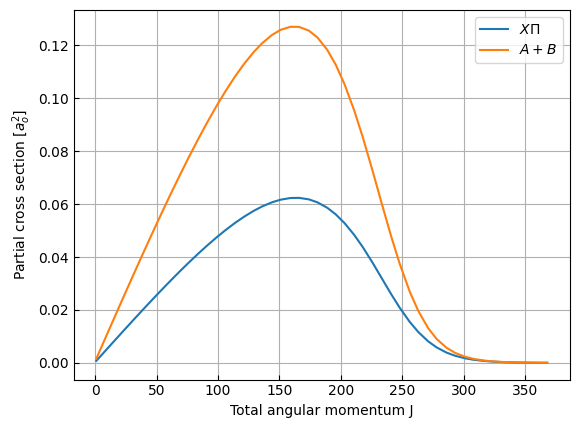

In [27]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_1_1.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_1_1.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

In [28]:
pi_rate_0 = pi_reaction_0.reaction_rate
pi_rate_1 = pi_reaction_1_0.reaction_rate + pi_reaction_1_1.reaction_rate

di_rate_0 = di_reaction_0.reaction_rate
di_rate_1 = di_reaction_1_0.reaction_rate + di_reaction_1_1.reaction_rate

print(f"Total reaction rate for j=0:")
print(f"Penning ionization: {pi_rate_0:.4}")
print(f"Dissociative ionization: {di_rate_0:.4}")
print()
print(f"Total reaction rate for j=1:")
print(f"Penning ionization: {pi_rate_1:.4}")
print(f"Dissociative ionization: {di_rate_1:.4}")
print()
print(f"Ratios j=1 to j=0:")
print(f"Penning ionization: {pi_rate_1/pi_rate_0}")
print(f"Dissociative ionization: {di_rate_1/di_rate_0}")

Total reaction rate for j=0:
Penning ionization: 8.569e-11
Dissociative ionization: 1.858e-10

Total reaction rate for j=1:
Penning ionization: 8.578e-11
Dissociative ionization: 1.86e-10

Ratios j=1 to j=0:
Penning ionization: 1.0011340234573711
Dissociative ionization: 1.0009608458808903


[2.40573777e-10            nan            nan            nan
            nan] [7.45691906e-11 6.91113020e-11 7.11058819e-11 7.08091885e-11
 7.07674588e-11] [1.65780820e-10 1.73728436e-10 1.75939807e-10 1.75494447e-10
 1.75297924e-10] [5.90327022e-10            nan            nan            nan
            nan] [2.24194556e-10 1.86223454e-10 1.88859006e-10 1.88239128e-10
 1.88001902e-10] [3.66471437e-10 4.19978843e-10 4.25901004e-10 4.23975646e-10
 4.23407941e-10]


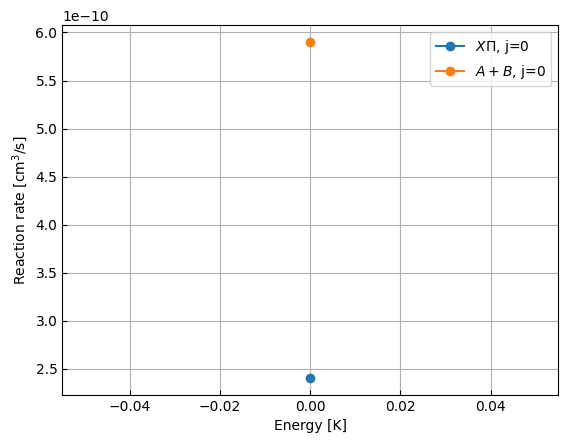

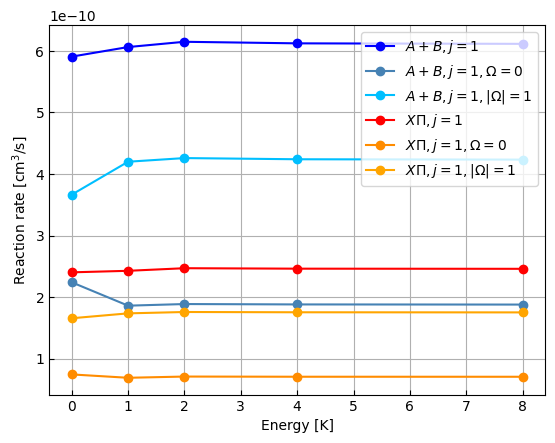

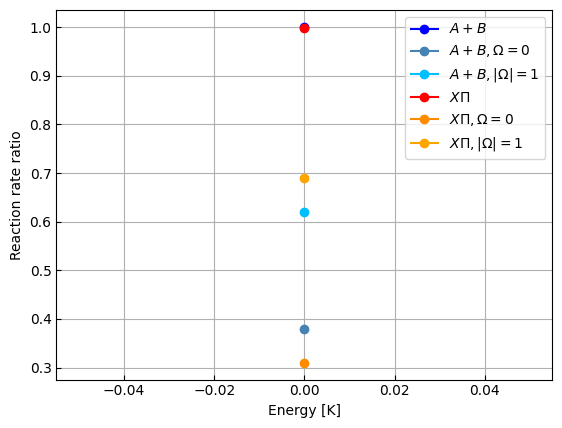

In [31]:
omega_maxes = [0, 1, 2, 4, 8]

xpi0, xpi10, xpi11, bsigma0, bsigma10, bsigma11 = get_reaction_rate_dependence("coriolis_losses_omega_max", omega_maxes, identity=0)

print(xpi0, xpi10, xpi11, bsigma0, bsigma10, bsigma11)

fig, ax = plot_reaction_rate_dependence_0("Energy [K]", omega_maxes, xpi0, bsigma0)
fig, ax = plot_reaction_rate_dependence_1("Energy [K]", omega_maxes, xpi10, xpi11, bsigma10, bsigma11)
fig, ax = plot_ratio_dependence("Energy [K]", omega_maxes, xpi0, xpi10, xpi11, bsigma0, bsigma10, bsigma11)